# Sentiment Analysis and Prediction of Review Ratings on Yelp Reviews Dataset using various Machine Learning Algorithms

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Loading Data

In [6]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('data/yelp.csv')


In [7]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)


Shape of the dataset:
(10000, 10)


In [42]:
# COLUMN NAMES
print("Column names:")
print(data.columns)


Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'length'],
      dtype='object')


In [43]:
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)


Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
length          int64
dtype: object


In [47]:
# CHECKING THE ENTRIES
print("Few dataset entries:")
data.head()


Few dataset entries:


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [48]:
# DATASET SUMMARY
data.describe(include='all')

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,ntN85eu27C04nwyPa8IHtw,2011-03-28,oQGOD6AqurJtRb4tn0J9wQ,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


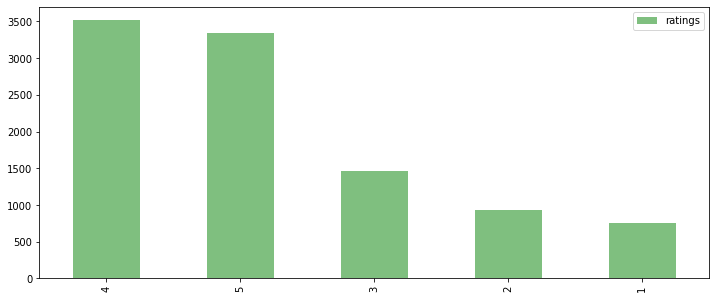

In [32]:
# CHEKCING THE DISTRIBUTION OF STAR RATINGS

plt.figure(figsize=(12,5))
data['stars'].value_counts().plot(kind='bar',alpha=0.5,color='green',label='ratings')
plt.legend()
plt.show()

In [4]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


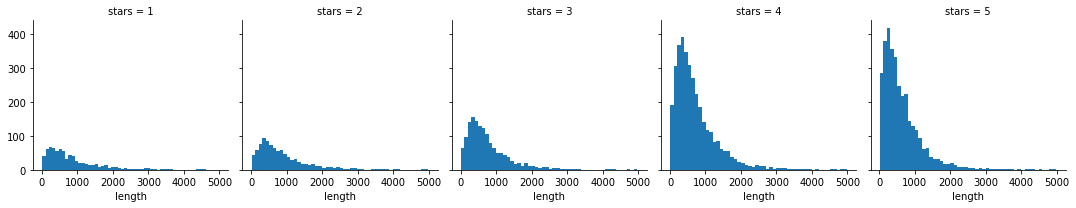

In [6]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50)

## Correlation between colums

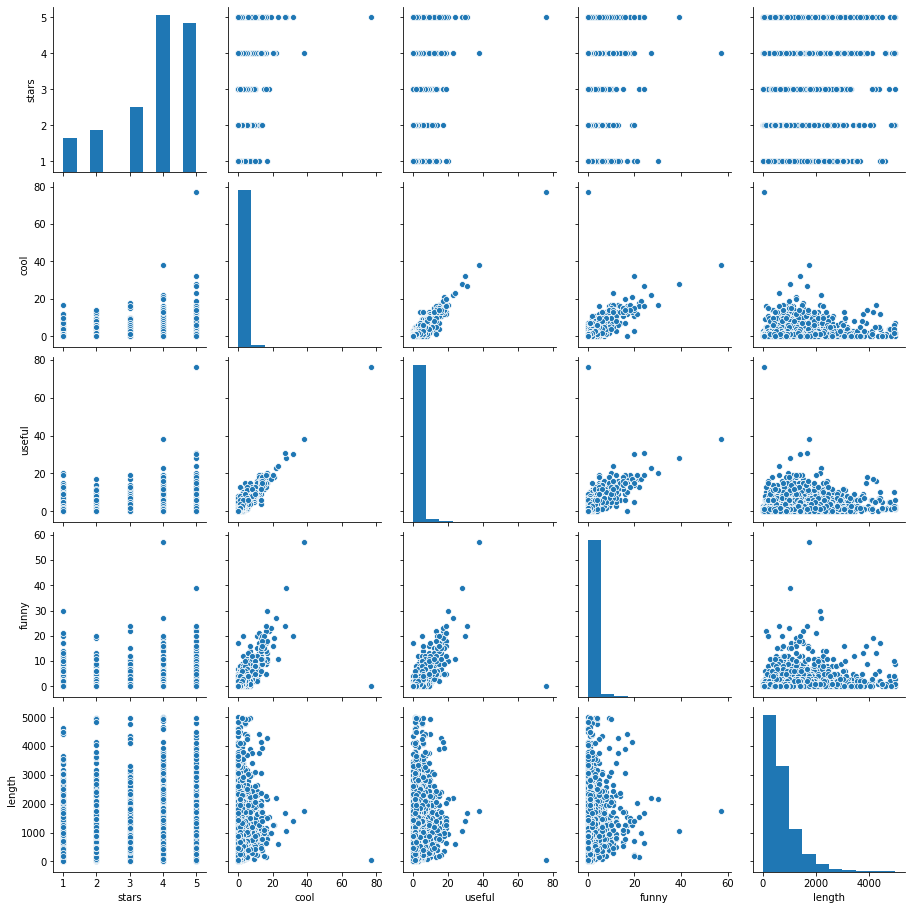

In [38]:
# Basic correlogram
sns.pairplot(data)
plt.show()


## Mean Value of the Vote columns

There are 3 voting columns for the reviews - funny, cool and useful. Let's take a look at the mean values with respect to the star ratings.

In [7]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = data.groupby('stars').mean()
stval

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


## Correlation between the voting columns


In [8]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
stval.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


Negative Correlations:

* Cool and Useful
* Cool and Funny
* Cool and Length  

The reviews marked cool tend to be not very funny or useful, and shorter in length.

Positive Correlations:

* Funny and Useful    
* Funny and Length
* Useful and Length    

Longer reviews tend to get votes on funny and useful.




In [ ]:
# # CLASSIFICATION
# data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
# data_classes.head()
# print(data_classes.shape)

# # Seperate the dataset into X and Y for prediction
# x = data_classes['text']
# y = data_classes['stars']

## Data Preprocessing

In [8]:
X = data['text']
y = data['stars']


In [9]:
X.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

In [10]:
y.head()

0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64

In [11]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## Vectorization

In [12]:
# CONVERTING THE WORDS INTO A VECTOR
count = CountVectorizer(analyzer=text_process).fit(X)

In [13]:
len(count.vocabulary_)

44012

In [14]:
r0 = X[0]
print(r0)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [81]:
vocab0 = count.transform([r0])
print(vocab0)

  (0, 417)	1
  (0, 1759)	1
  (0, 2614)	1
  (0, 5093)	1
  (0, 7275)	1
  (0, 7452)	2
  (0, 8904)	1
  (0, 12129)	1
  (0, 15180)	1
  (0, 15181)	1
  (0, 15823)	2
  (0, 16295)	1
  (0, 16708)	1
  (0, 17324)	2
  (0, 17345)	1
  (0, 17469)	1
  (0, 17587)	1
  (0, 17981)	1
  (0, 18005)	1
  (0, 18618)	1
  (0, 18682)	1
  (0, 20145)	1
  (0, 21684)	1
  (0, 22947)	1
  (0, 23100)	1
  :	:
  (0, 32793)	1
  (0, 33471)	1
  (0, 33601)	1
  (0, 33701)	1
  (0, 33861)	1
  (0, 33995)	1
  (0, 34511)	2
  (0, 35081)	2
  (0, 37071)	1
  (0, 37310)	1
  (0, 37932)	1
  (0, 38000)	1
  (0, 38053)	1
  (0, 39858)	1
  (0, 40310)	1
  (0, 41022)	1
  (0, 41140)	1
  (0, 41552)	1
  (0, 42281)	1
  (0, 42436)	1
  (0, 42757)	1
  (0, 42783)	1
  (0, 43043)	1
  (0, 43309)	1
  (0, 43372)	1


In [15]:
print("Getting the words back:")
print(count.get_feature_names()[19648])
print(count.get_feature_names()[10643])

Getting the words back:
cleanish
Phoenician


## Vectorization of the whole reivew set

In [16]:
x = count.transform(X)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (10000, 44012)
Non-Zero occurences:  583230
Density of the matrix =  0.1325161319640098


In [17]:
x.shape

(10000, 44012)

In [18]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# Ordinal Variables

An ordinal variable is similar to a categorical variable. However, the key difference between the two is that there is a clear ordering of the categories.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high. 

Now, our yelp review's star ratings range from 1 to 5. 

A reviewer can assign a star rating from integers 1 to 5, which makes it discrete. However, the business that receives the rating shows the aggregated average of the total star ratings, which then makes it continuous.


## Multinomial Naive Bayes

We have a multi-class classificiation problem with more features than rows.
Will use sklearn's Mulitnomial Naive Bayes algorithm.

In [88]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)


In [89]:
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))


Confusion Matrix for Multinomial Naive Bayes:
[[ 30  24  15  55  21]
 [  6   6  18 133  15]
 [  2   2  15 246  38]
 [  4   3  15 548 143]
 [  2   2   8 286 363]]


In [91]:
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:")
print("Classification Report:")
print(classification_report(y_test,predmnb))

Score: 48.1
Classification Report:
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.21      0.32       145
           2       0.16      0.03      0.06       178
           3       0.21      0.05      0.08       303
           4       0.43      0.77      0.55       713
           5       0.63      0.55      0.59       661

    accuracy                           0.48      2000
   macro avg       0.42      0.32      0.32      2000
weighted avg       0.46      0.48      0.43      2000



## Decision Tree

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Decision Tree consists of :

* Nodes : Test for the value of a certain attribute.
* Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
* Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).

In this method, the training set is broken down into smaller and smaller subsets while at the same time an associated decision tree get incrementally developed. At the end of the learning process, a decision tree covering the training set is returned.

The key idea is to use a decision tree to partition the data space into cluster (or dense) regions and empty (or sparse) regions.

### Basic Algorithm

1. Select a test for root node. Create branch for each possible outcome of the test.
2. Split instances into subsets. One for each branch extending from the node.
3. Repeat recursively for each branch, using only instances that reach the branch.
4. Stop recursion for a branch if all its instances have the same class.

### Decision Tree Classifier

* Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG) (reduction in uncertainty towards the final decision).

* In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each leaf node all belong to the same class.

* In practice, we may set a limit on the depth of the tree to prevent overfitting. We compromise on purity here somewhat as the final leaves may still have some impurity.

What we're using is a classification tree, where the outcome is a variable like 'fit' or 'unfit'. Here the decision variable is Categorical and discrete.

In [93]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:")
print(classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 35  25  20  43  22]
 [ 31  30  30  57  30]
 [  9  34  70 116  74]
 [ 28  57  96 308 224]
 [ 24  29  50 247 311]]
Score: 37.7
Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.24      0.26       145
           2       0.17      0.17      0.17       178
           3       0.26      0.23      0.25       303
           4       0.40      0.43      0.42       713
           5       0.47      0.47      0.47       661

    accuracy                           0.38      2000
   macro avg       0.32      0.31      0.31      2000
weighted avg       0.37      0.38      0.37      2000



Since star rating isn't strictly a category and can be seen as continuous values when aggregated for average, Decision Tree Regressor was used here.

In [95]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predtr = dt.predict(x_test)
# print("Confusion Matrix for Decision Tree:")
# print(confusion_matrix(y_test,predtr))
# print("Score:",round(accuracy_score(y_test,predtr)*100,2))
# print("Classification Report:")
# print(classification_report(y_test,predtr))


Confusion Matrix for Decision Tree:
[[ 35  25  20  43  22]
 [ 31  30  30  57  30]
 [  9  34  70 116  74]
 [ 28  57  96 308 224]
 [ 24  29  50 247 311]]
Score: 37.7
Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.24      0.26       145
           2       0.17      0.17      0.17       178
           3       0.26      0.23      0.25       303
           4       0.40      0.43      0.42       713
           5       0.47      0.47      0.47       661

    accuracy                           0.38      2000
   macro avg       0.32      0.31      0.31      2000
weighted avg       0.37      0.38      0.37      2000



In [97]:
# GETTING RMSE
from sklearn import metrics

score = np.sqrt(metrics.mean_squared_error(y_test,predtr))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 1.374227055475186


## Random Forest

### Ensemble Learning

An Ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model. A model comprised of many models is called an Ensemble model.

#### Types of Ensemble Learning

1. Boosting

    Boosting refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners. Each model that runs, dictates what features the next model will focus on. In boosting, one is learning from other which in turn boosts the learning.


2. Bootstrap Aggregation (Bagging)

    Bootstrap refers to random sampling with replacement. Bootstrap allows us to better understand the bias and the variance with the dataset. Bootstrap involves random sampling of small subset of data from the dataset.
    It is a general procedure that can be used to reduce the variance for those algorithm that have high variance, typically decision trees. Bagging makes each model run independently and then aggregates the outputs at the end without preference to any model.
    
#### Problems with Decision Trees

Decision trees are sensitive to the specific data on which they are trained. If the training data is changed the resulting decision tree can be quite different and in turn the predictions can be quite different.

Also Decision trees are computationally expensive to train, carry a big risk of overfitting, and tend to find local optima because they can’t go back after they have made a split.
To address these weaknesses, we turn to Random Forest :) which illustrates the power of combining many decision trees into one model.

### Random Forest

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.
Random forest is a bagging technique and not a boosting technique. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.

It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

A random forest is a meta-estimator (i.e. it combines the result of multiple predictions) which aggregates many decision trees, with some helpful modifications:

1. The number of features that can be split on at each node is limited to some percentage of the total (which is known as the hyperparameter). This ensures that the ensemble model does not rely too heavily on any individual feature, and makes fair use of all potentially predictive features.

2. Each tree draws a random sample from the original data set when generating its splits, adding a further element of randomness that prevents overfitting.

The above modifications help prevent the trees from being too highly correlated.


In [92]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 24   8   3  69  41]
 [  4   4   4 125  41]
 [  1   3  11 239  49]
 [  1   2   3 501 206]
 [  0   1   0 280 380]]
Score: 46.0
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.17      0.27       145
           2       0.22      0.02      0.04       178
           3       0.52      0.04      0.07       303
           4       0.41      0.70      0.52       713
           5       0.53      0.57      0.55       661

    accuracy                           0.46      2000
   macro avg       0.50      0.30      0.29      2000
weighted avg       0.48      0.46      0.40      2000



In [98]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rmfrr = RandomForestRegressor()
rmfrr.fit(x_train,y_train)
predrmfrr = rmfr.predict(x_test)

score = np.sqrt(metrics.mean_squared_error(y_test,predrmfrr))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 1.2511994245522973


# Gradient Boosting

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. 

## How Gradient Boosting Works

### Gradient boosting involves three elements:

1. A loss function to be optimized.
2. A weak learner to make predictions.
3. An additive model to add weak learners to minimize the loss function.



* Loss Function:

    The loss function used depends on the type of problem being solved.

    It must be differentiable, but many standard loss functions are supported and you can define your own.

    For example, regression may use a squared error and classification may use logarithmic loss.

    A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.


* Weak Learner

    Decision trees are used as the weak learner in gradient boosting.

    Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and “correct” the residuals in the predictions.

    Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss.

    Initially, such as in the case of AdaBoost, very short decision trees were used that only had a single split, called a decision stump. Larger trees can be used generally with 4-to-8 levels.

    It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.
    This is to ensure that the learners remain weak, but can still be constructed in a greedy manner.
    

* Additive Model    

    Trees are added one at a time, and existing trees in the model are not changed.

    A gradient descent procedure is used to minimize the loss when adding trees.

    Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.

    Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss.

    Generally this approach is called functional gradient descent or gradient descent with functions.
    
    

In [101]:
#Gradient Boosting Classifier
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 49  13   8  34  41]
 [ 21  13  27  82  35]
 [  5  14  47 180  57]
 [  8   9  26 405 265]
 [  3   3   6 227 422]]
Score: 46.8
Classification Report:               precision    recall  f1-score   support

           1       0.57      0.34      0.42       145
           2       0.25      0.07      0.11       178
           3       0.41      0.16      0.23       303
           4       0.44      0.57      0.49       713
           5       0.51      0.64      0.57       661

    accuracy                           0.47      2000
   macro avg       0.44      0.35      0.37      2000
weighted avg       0.45      0.47      0.44      2000



In [103]:
from sklearn.ensemble import GradientBoostingRegressor

#Gradient Boosting Regressor
gbr = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbr.fit(x_train,y_train)
predgbr = gbi.predict(x_test)

score = np.sqrt(metrics.mean_squared_error(y_test,predgbr))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 1.1968709203585823


## Comparing the Models

In [105]:
from sklearn.ensemble import AdaBoostRegressor

In [106]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1, loss='ls',
                                 n_estimators=100, random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(), learning_rate=0.1,
                                 loss='linear', n_estimators=100, random_state=1)

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score

In [110]:
def cross_val(estimator, X_train, y_train, nfolds):

    mse = cross_val_score(estimator, X_train, y_train, 
                          scoring='neg_mean_squared_error',
                          cv=nfolds, n_jobs=-1) * -1
    # mse multiplied by -1 to make positive
    r2 = cross_val_score(estimator, X_train, y_train, 
                         scoring='r2', cv=nfolds, n_jobs=-1)
    mean_mse = mse.mean()
    mean_r2 = r2.mean()
    name = estimator.__class__.__name__
    print("{0:<25s} Train CV | MSE: {1:0.3f} | R2: {2:0.3f}".format(name,
                                                        mean_mse, mean_r2))
    return mean_mse, mean_r2

In [111]:
k = 10 # number of folds in the cross-validation 
cross_val(rf, x_train, y_train, k) 
cross_val(gdbr, x_train, y_train, k) 
cross_val(abr, x_train, y_train, k); 

RandomForestRegressor     Train CV | MSE: 1.002 | R2: 0.323
GradientBoostingRegressor Train CV | MSE: 1.018 | R2: 0.312
AdaBoostRegressor         Train CV | MSE: 1.081 | R2: 0.270


In [113]:
gdbr_lr1 = GradientBoostingRegressor(learning_rate=1.0, loss='ls',
                                     n_estimators=100, random_state=1) 
print("Cross validation score of Gradient Boosting Regressor with lr = 0.1:")
cross_val(gdbr, x_train, y_train, k) 
print("Cross validation score of Gradient Boosting Regressor with lr = 1.0:")
cross_val(gdbr_lr1, x_train, y_train, k);

Cross validation score of Gradient Boosting Regressor with lr = 0.1:
GradientBoostingRegressor Train CV | MSE: 1.018 | R2: 0.312
Cross validation score of Gradient Boosting Regressor with lr = 1.0:
GradientBoostingRegressor Train CV | MSE: 1.289 | R2: 0.129


In [21]:
np.sqrt(1.018)

1.0089598604503551

In [117]:
from sklearn.metrics import mean_squared_error, r2_score


In [114]:
def stage_score_plot(estimator, X_train, y_train, X_test, y_test):
    '''
        Parameters: estimator: GradientBoostingRegressor or AdaBoostRegressor
                    X_train: 2d numpy array
                    y_train: 1d numpy array
                    X_test: 2d numpy array
                    y_test: 1d numpy array

        Returns: A plot of the number of iterations vs the MSE for the model for
        both the training set and test set.
    '''
    estimator.fit(X_train, y_train)
    name = estimator.__class__.__name__.replace('Regressor', '')
    learn_rate = estimator.learning_rate
    # initialize 
    train_scores = np.zeros((estimator.n_estimators,), dtype=np.float64)
    test_scores = np.zeros((estimator.n_estimators,), dtype=np.float64)
    # Get train score from each boost
    for i, y_train_pred in enumerate(estimator.staged_predict(X_train)):
        train_scores[i] = mean_squared_error(y_train, y_train_pred)
    # Get test score from each boost
    for i, y_test_pred in enumerate(estimator.staged_predict(X_test)):
        test_scores[i] = mean_squared_error(y_test, y_test_pred)
    plt.plot(train_scores, alpha=.5, label="{0} Train - learning rate {1}".format(
                                                                name, learn_rate))
    plt.plot(test_scores, alpha=.5, label="{0} Test  - learning rate {1}".format(
                                                      name, learn_rate), ls='--')
    plt.title(name, fontsize=16, fontweight='bold')
    plt.ylabel('MSE', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)

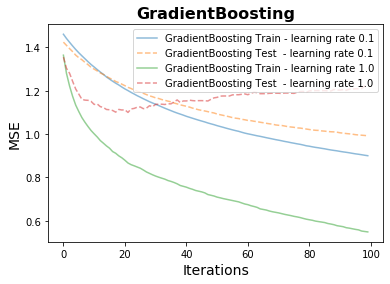

In [118]:
stage_score_plot(gdbr, x_train, y_train, x_test, y_test)
stage_score_plot(gdbr_lr1, x_train, y_train, x_test, y_test)
plt.legend();

For both learning rates the train error drops with progressive boosting stages (iterations).  However, the larger learning rate test error doesn't decrease as more iterations are added. Rather, it increases after 20 iterations or so. 
The larger learning rate makes large changes per iteration and so likely overfits the data.  For the lower learning rate model to get low test error, many boosting stages are required.

In [119]:
def rf_score_plot(randforest, X_train, y_train, X_test, y_test):
    '''
        Parameters: randforest: RandomForestRegressor
                    X_train: 2d numpy array
                    y_train: 1d numpy array
                    X_test: 2d numpy array
                    y_test: 1d numpy array

        Returns: The prediction of a random forest regressor on the test set
    '''
    randforest.fit(X_train, y_train)
    y_test_pred = randforest.predict(X_test)
    test_score = mean_squared_error(y_test, y_test_pred)
    plt.axhline(test_score, alpha = 0.7, c = 'y', lw=3, ls='-.', label = 
                                                        'Random Forest Test')

### Comparing the Gradient Boosting Regressor with lr = 0.1 to a Random Forest Regressor

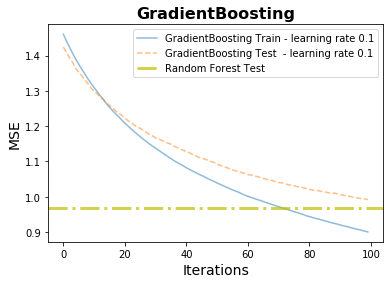

In [120]:
stage_score_plot(gdbr, x_train, y_train, x_test, y_test)
rf_score_plot(rmfrr, x_train, y_train, x_test, y_test)
plt.legend();

### Comparing Adaboost Regression with lr = 0.1 to the Random Forest Regressor

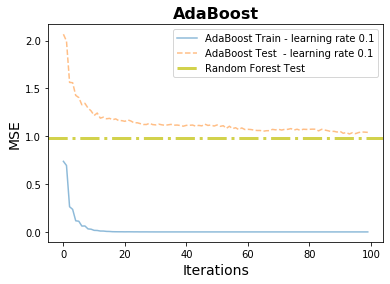

In [122]:
stage_score_plot(abr, x_train, y_train, x_test, y_test)
rf_score_plot(rf, x_train, y_train, x_test, y_test)
plt.legend();

#### Use gridsearch to find the best hyperparameters for the Random Forest

In [124]:
def gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
    '''
        Parameters: estimator: the type of model (e.g. RandomForestRegressor())
                    paramter_grid: dictionary defining the gridsearch parameters
                    X_train: 2d numpy array
                    y_train: 1d numpy array

        Returns:  best parameters and model fit with those parameters
    '''
    model_gridsearch = GridSearchCV(estimator,
                                    parameter_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='neg_mean_squared_error')
    model_gridsearch.fit(X_train, y_train)
    best_params = model_gridsearch.best_params_ 
    model_best = model_gridsearch.best_estimator_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best

In [126]:
def display_default_and_gsearch_model_results(model_default, model_gridsearch, 
                                              X_test, y_test):
    '''
        Parameters: model_default: fit model using initial parameters
                    model_gridsearch: fit model using parameters from gridsearch
                    X_test: 2d numpy array
                    y_test: 1d numpy array
        Return: None, but prints out mse and r2 for the default and model with
                gridsearched parameters
    '''
    name = model_default.__class__.__name__.replace('Regressor', '') # for printing
    y_test_pred = model_gridsearch.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print("Results for {0}".format(name))
    print("Gridsearched model mse: {0:0.3f} | r2: {1:0.3f}".format(mse, r2))
    y_test_pred = model_default.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print("     Default model mse: {0:0.3f} | r2: {1:0.3f}".format(mse, r2))


In [125]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80],
                      'random_state': [1]}
rf_best_params, rf_best_model = gridsearch_with_output(RandomForestRegressor(), 
                                                       random_forest_grid, 
                                                       x_train, y_train)
print("\nComparing model with gridsearch params to initial model on Test set.")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 56.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 69.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 146.5min finished



Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
max_depth            | None     | [3, None]
max_features         | sqrt     | ['sqrt', 'log2', None]
min_samples_split    | 2        | [2, 4]
min_samples_leaf     | 1        | [1, 2, 4]
bootstrap            | False    | [True, False]
n_estimators         | 80       | [10, 20, 40, 80]
random_state         | 1        | [1]

Comparing model with gridsearch params to initial model on Test set.


NameError: name 'display_default_and_gsearch_model_results' is not defined

In [127]:
rf.fit(x_train, y_train)
display_default_and_gsearch_model_results(rf, rf_best_model, x_test, y_test)

Results for RandomForest
Gridsearched model mse: 0.961 | r2: 0.334
     Default model mse: 0.979 | r2: 0.322


#### Use gridsearch to find the best hyperparameters for the Gradient Boosting

In [129]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                          'max_depth': [2, 4, 6],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'max_features': [1.0, 0.3, 0.1],
                          'n_estimators': [500],
                          'random_state': [1]}
gdbr_best_params, gdbr_best_model = gridsearch_with_output(GradientBoostingRegressor(), 
                                                           gradient_boosting_grid, 
                                                           x_train, y_train)
print("\nComparing model with gridsearch params to initial model on Test set.")
gdbr.fit(x_train, y_train)
display_default_and_gsearch_model_results(gdbr, gdbr_best_model, x_test, y_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 86.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 184.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 309.8min finished



Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
learning_rate        | 0.1      | [0.1, 0.05, 0.02, 0.01]
max_depth            | 6        | [2, 4, 6]
min_samples_leaf     | 10       | [1, 2, 5, 10]
max_features         | 0.1      | [1.0, 0.3, 0.1]
n_estimators         | 500      | [500]
random_state         | 1        | [1]

Comparing model with gridsearch params to initial model on Test set.
Results for GradientBoosting
Gridsearched model mse: 0.822 | r2: 0.431
     Default model mse: 0.992 | r2: 0.313


In [26]:
# XGBoost Classifier
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/saehuh/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/saehuh/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


# Support Vector Machines

In [94]:
# Support Vector Machines

from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:")
print(classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 25  10   1  60  49]
 [  7  18   9 112  32]
 [  2   1  26 217  57]
 [  1   0   4 476 232]
 [  0   1   0 228 432]]
Score: 48.85
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.17      0.28       145
           2       0.60      0.10      0.17       178
           3       0.65      0.09      0.15       303
           4       0.44      0.67      0.53       713
           5       0.54      0.65      0.59       661

    accuracy                           0.49      2000
   macro avg       0.59      0.34      0.34      2000
weighted avg       0.54      0.49      0.44      2000



In [19]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 21   3  15  28  78]
 [ 18   1   7  54  98]
 [ 27   5  15 111 145]
 [ 37   2  16 245 413]
 [ 33   4  10 156 458]]
Score:  37.0
Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.14      0.15       145
           2       0.07      0.01      0.01       178
           3       0.24      0.05      0.08       303
           4       0.41      0.34      0.37       713
           5       0.38      0.69      0.49       661

    accuracy                           0.37      2000
   macro avg       0.25      0.25      0.22      2000
weighted avg       0.33      0.37      0.32      2000



In [20]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 62  33  15  17  18]
 [ 31  45  47  39  16]
 [ 13  31  94 111  54]
 [  6  16  97 361 233]
 [ 10   7  22 229 393]]
Score: 47.75
Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.43      0.46       145
           2       0.34      0.25      0.29       178
           3       0.34      0.31      0.33       303
           4       0.48      0.51      0.49       713
           5       0.55      0.59      0.57       661

    accuracy                           0.48      2000
   macro avg       0.44      0.42      0.43      2000
weighted avg       0.47      0.48      0.47      2000



In [28]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:  5
Predicted Rating:


5

In [29]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

In [30]:
# NEGATIVE REVIEW
nr = data['text'][16]
print(nr)
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

In [31]:
count = data['stars'].value_counts()
print(count)

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64


In [22]:
X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object